
#  Predicting Customer Churn
---
*   BENC2011: Data Science, Final Project
*   Maastricht University, May 2023
*   i6336489, i6252740, i6281513














This project draws inspiration from an online course (https://app.datacamp.com/learn/courses/marketing-analytics-predicting-customer-churn-in-python). 

The code we developed applies these techniques to our specific dataset. Additionaly, we utilized the experience gained from tutorials of BENC2011: Data Science at Maastricht University.

The report is structured as to reflect the stages of a data science process.

## 1. Business understanding

Customer churn refers to the phenomenon where customers or subscribers discontinue their relationship with a business or service provider. It is also commonly referred to as customer attrition or customer turnover. Churn can occur in various industries, including telecommunications, banking, e-commerce, and subscription-based services. Customer churn is a critical metric for businesses as it directly impacts their revenue and profitability. When customers churn, businesses lose their recurring revenue stream and often incur additional costs to acquire new customers to replace the lost ones. Therefore, understanding and predicting customer churn is crucial for businesses to retain their customer base and maintain sustainable growth.

### The data science questions we attempt to answer




1.  What are the key factors that contribute to    customer churn?
2.  Can we predict which customers are most likely to churn?
3.  How accurate can we make predictions about customer churn?
4.  What actions or strategies can be implemented to reduce customer churn?









###  Why the chosen datasets is appropriate for these questions


The Iranian Churn Dataset was found at the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Iranian+Churn+Dataset), where it is accompanied by the following description:

* *This dataset is randomly collected from an Iranian telecom company database over a period of 12 months. A total of 3150 rows of data, each representing a customer, bear information for 13 columns. The attributes that are in this dataset are call failures, frequency of SMS, number of complaints, number of distinct calls, subscription length, age group, the charge amount, type of service, seconds of use, status, frequency of use, and Customer Value. All of the attributes except for attribute churn is the aggregated data of the first 9 months. The churn labels are the state of the customers at the end of 12 months. The three months is the designated planning gap.*



It may be appropriate for addressing questions related to customer churn because

* it includes a churn label (whether a customer has churned or not) which will serve as the target variable for your predictive modeling task,

* it provides various features that can be relevant in understanding customer churn,

* it consists of a significant number of observations, with records for both churned and non-churned customers,

*  and it has been curated and shared on a reputable platform.


 Data Dictionary:


| Column                  | Explanation                                             |
|-------------------------|---------------------------------------------------------|
| Call Failure            | number of call failures                                 |
| Complaints              | binary (0: No complaint, 1: complaint)                  |
| Subscription Length     | total months of subscription                            |
| Charge Amount           | ordinal attribute (0: lowest amount, 9: highest amount) |
| Seconds of Use          | total seconds of calls                                  |
| Frequency of use        | total number of calls                                   |
| Frequency of SMS        | total number of text messages                           |
| Distinct Called Numbers | total number of distinct phone calls                    |
| Age Group               | ordinal attribute (1: younger age, 5: older age)        |
| Tariff Plan             | binary (1: Pay as you go, 2: contractual)               |
| Status                  | binary (1: active, 2: non-active)                       |
| Age                     | age of customer                                         |
| Customer Value          | the calculated value of customer                        |
| Churn                   | class label (1: churn, 0: non-churn)                    |

Data downloaded from: https://app.datacamp.com/workspace/w/3bcbf7aa-ad3e-4ff9-9996-d8ea525d0ceb/edit

Citation: Jafari-Marandi, R., Denton, J., Idris, A., Smith, B. K., & Keramati, A. (2020). Optimum Profit-Driven Churn Decision Making: Innovative Artificial Neural Networks in Telecom Industry. Neural Computing and Applications.

###  How will we do it/what we did


**Data Exploration**

*Exploring the dataset to gain a better understanding of its structure and content. Identify the different variables, their data types, and any missing values or outliers that need to be addressed. Visualize the data and compute basic statistics to gain insights into the distribution and characteristics of the features.*

**Data Preprocessing** 

*Cleaning the dataset by handling missing values, outliers, and any inconsistencies. This involves imputing missing values, removing outliers, and ensuring data consistency across variables. Encoding categorical variables if necessary and scaling numerical features as required.*

**Feature Selection**

*Analyzying the relevance and importance of each feature in relation to the target variable (churn). Using techniques such as correlation analysis, feature importance from machine learning models, or domain knowledge to select the most relevant features for predicting churn.*

**Model Selection**

*Choosing appropriate machine learning models for predicting customer churn. Commonly used models for churn prediction include logistic regression, decision trees, random forests, support vector machines, gradient boosting models, or neural networks. Selecting models that align with the dataset characteristics, complexity, interpretability, and performance requirements.*

**Model Training and Evaluation**

*Splitting the dataset into training and testing sets. Training the selected models on the training set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC). Fine-tuning the model parameters using techniques like cross-validation or grid search. Evaluate the models' performance on the testing set to select the best-performing model(s).*

**Analysis and Interpretation**

*Analyzing the results and interpreting the model's predictions and the importance of different features. Identifing the key factors driving customer churn and gaining insights into potential strategies for customer retention.*

**Reporting and Communication**

*Summarizing the project, including data exploration findings, preprocessing steps, model selection, training, and evaluation results. Visualizing the findings using charts, graphs, and other visual to convey the insights gained. Present the conclusions, implications, and potential recommendations for reducing customer churn based on the analysis.*


##  2. Data understanding


Our data is already collected and described. We proceed with exploring it, which, in turn, verifies its quality.

### Exploratory data analysis

We will do a brief exploration to get a better idea of what our dataset contains, this will give us a better idea of how to process the data. 

Let's import the libraries we will need for this  project:

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = [11, 4]

Then we can load the data:

In [3]:
df = pd.read_csv("churn.csv")

The info() method of a pandas DataFrame prints a concise summary of the data contained within the DataFrame. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call Failure             3150 non-null   int64  
 1   Complaints               3150 non-null   int64  
 2   Subscription Length      3150 non-null   int64  
 3   Charge Amount            3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

* The data contains 3150 data samples
* There are 14 total columns including the target column (what we want to predict)
* There are 0 columns with missing values; we can infer this from the “Non-Null Count” column. 
* All  data types are int64 or float64.

We can also call the describe() method on our DataFrame to get descriptive statistics about each feature in the dataset.

In [5]:
df.describe() 

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


To have an idea of the type of values being held in each feature, we use the head() method to display the first five rows of data.

In [6]:
df.head()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


We observe that the features are on different scales, which may cause problems when dealing algorithms sensitive to the range of data points. 

In [7]:
# Summary statistics for both classes
display(df["Churn"].value_counts(normalize=True))

Churn
0    0.842857
1    0.157143
Name: proportion, dtype: float64

The data is imbalanced in terms of customer churn since only around 16% of customers did churn.

[Text(0, 0, 'Churn'), Text(1, 0, 'No Churn')]

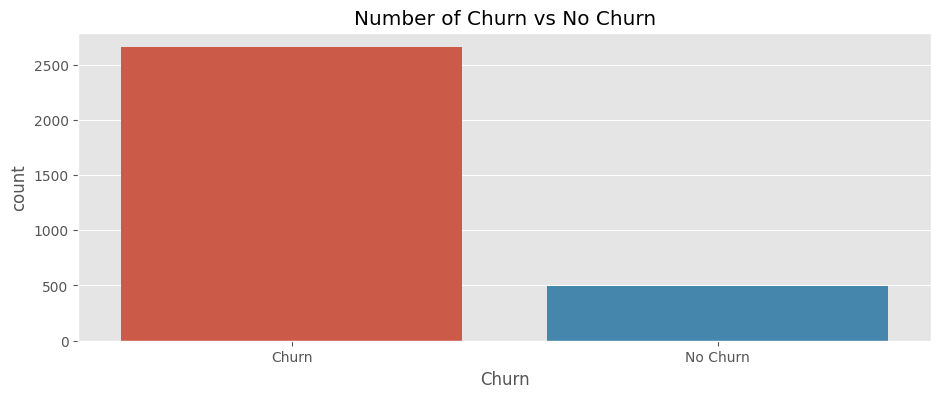

In [8]:
g=sns.countplot(data=df,x='Churn')
g.set_title('Number of Churn vs No Churn')
g.set_xticklabels(['Churn','No Churn'])

We compare the mean and standard deviation across classes:

In [9]:
display(df.groupby(['Churn']).mean())
display(df.groupby(['Churn']).std())

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
Churn,,,,,,,,,,,,,
0,7.656121,0.015443,32.662524,1.075706,5014.224105,76.979284,83.871563,25.582674,2.831638,1.090019,1.155179,31.065913,535.511501
1,7.476768,0.404040,31.894949,0.230303,1566.632323,29.133333,15.802020,12.391919,2.795960,1.012121,1.747475,30.636364,124.811414


,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value
Churn,,,,,,,,,,,,,
0,7.154318,0.123328,8.392357,1.600653,4312.742630,58.499847,118.808594,17.389349,0.922331,0.286263,0.362143,9.147610,536.214629
1,7.831407,0.491202,9.469163,0.616483,1539.203365,26.323478,23.515289,10.867622,0.711945,0.109538,0.434900,6.886081,129.429850


There are some features with significantly different statistics, e.g. unsuprisingly, churners seem to complain more than non-churners.

In [10]:
display(df.groupby('Age Group')['Churn'].value_counts())

Age Group  Churn
1          0         123
2          0         853
           1         184
3          0        1195
           1         230
4          0         316
           1          79
5          0         168
           1           2
Name: count, dtype: int64

Age group 1 has no churned customers. 

Age group 3 has the highest number of customers who churned  while age group 2 has the highest percentage.  

Age Group
3    45.238095
2    32.920635
4    12.539683
5     5.396825
1     3.904762
Name: proportion, dtype: float64

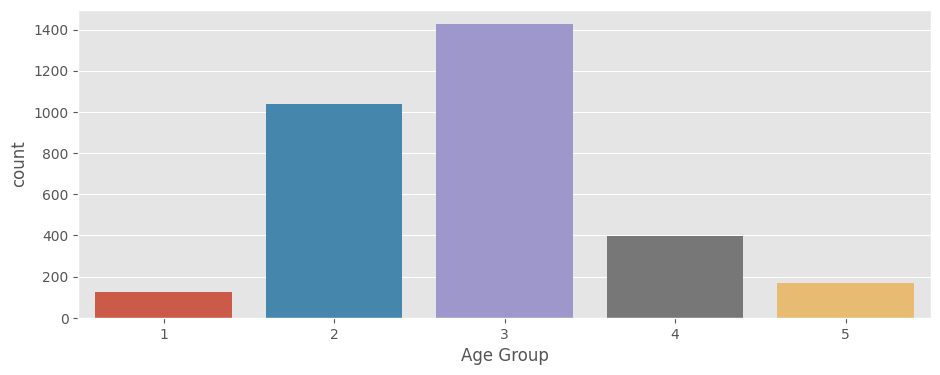

Charge Amount
0     56.126984
1     19.587302
2     12.539683
3      6.317460
4      2.412698
5      0.952381
8      0.603175
9      0.444444
7      0.444444
6      0.349206
10     0.222222
Name: proportion, dtype: float64

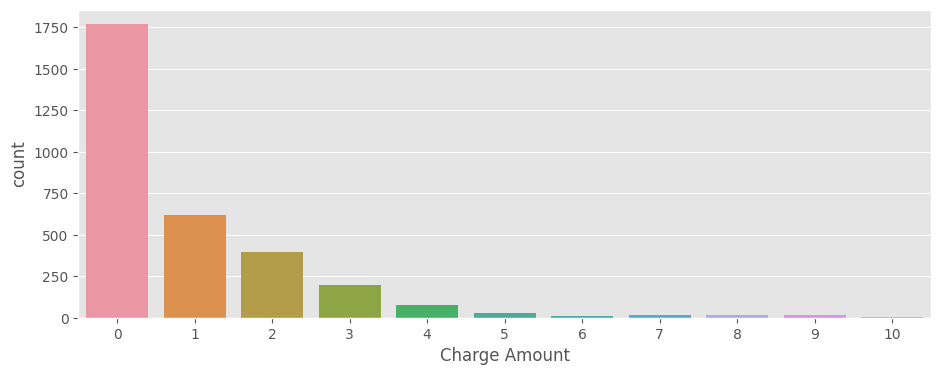

In [11]:
# Percentage distributions of ordinal features
for column in df[["Age Group","Charge Amount"]].columns:
  display(df[column].value_counts(normalize=True) * 100)
  sns.countplot(x=df[column])
  plt.show()

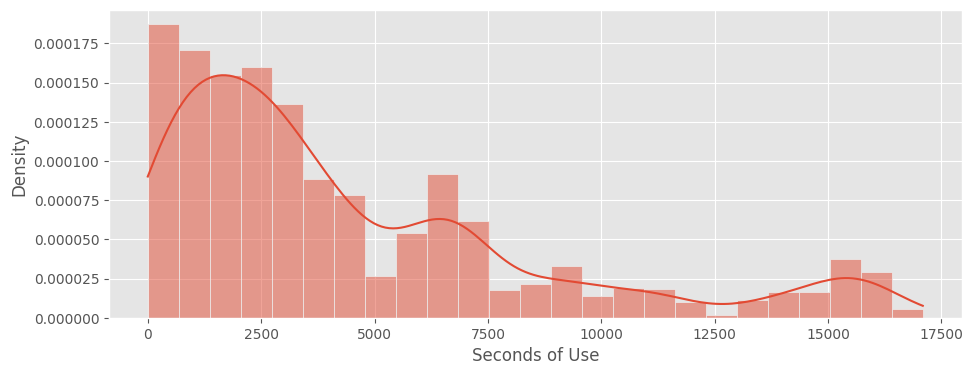

In [12]:
# Exploring feature distributions
sns.histplot(df["Seconds of Use"], kde=True, stat="density")
# Display the plot
plt.show()

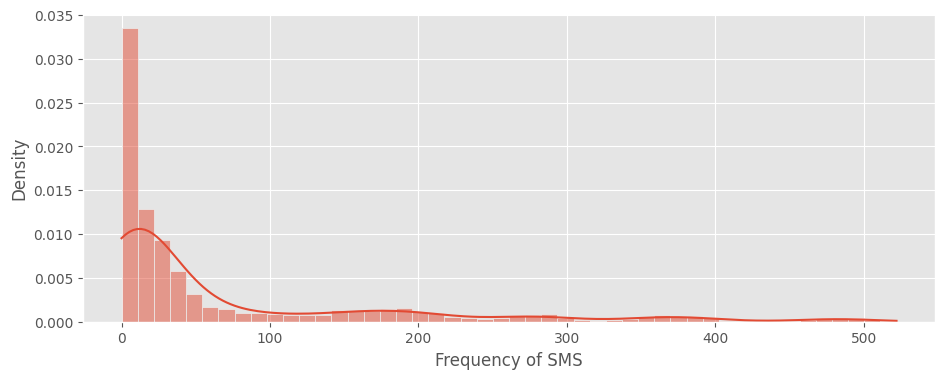

In [13]:
sns.histplot(df["Frequency of SMS"], kde=True, stat="density")
# Display the plot
plt.show()

The features do not appear to be well approximated by the normal distribution This is another aspect to consider before we proceed with model training as some models work better with normally distributed features.

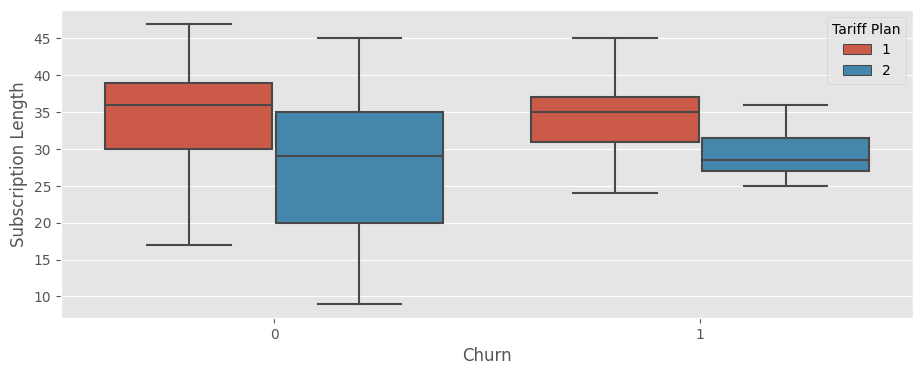

In [14]:
sns.boxplot(x = 'Churn',
            y = 'Subscription Length',
            data = df,
            sym = "",
            hue = "Tariff Plan")
plt.show()

Both classes of customers are using the service longer when subscribing to the tariff plan 1 (Pay as you go) rather than tariff plan 2 (Contractual).

Based on our analysis, the data seems to be of good quality.

## 3. Data preparation

We have a decent understanding of what our data looks like and we begin moving toward preparing the data to be fed into a machine learning model. 

### Clean data

In [15]:
# Identifying features to convert
df.dtypes

Call Failure                 int64
Complaints                   int64
Subscription Length          int64
Charge Amount                int64
Seconds of Use               int64
Frequency of use             int64
Frequency of SMS             int64
Distinct Called Numbers      int64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                        int64
dtype: object

Both the features and churn label are already encoded in a suitable format.

In [16]:
# Handling the missing values
df.isna().sum()

Call Failure               0
Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

The data is without missing values.

In [17]:
# Handling duplicates
print(df.duplicated().sum())
df=df.drop_duplicates(keep='first')
len(df)


300


2850

### Select data


We see 300 duplicate rows in our dataset.
Since they may contaminate the training data with the test data or vice versa, we drop them.

In [18]:
# Feature selection
df.corr()

,Call Failure,Complaints,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
Call Failure,1.000000,0.149564,0.177206,0.585442,0.495463,0.567096,-0.031926,0.498604,0.049340,0.187537,-0.094090,0.043799,0.110228,0.003310
Complaints,0.149564,1.000000,-0.019229,-0.035887,-0.108934,-0.095519,-0.114729,-0.061314,0.015761,0.002461,0.282928,-0.000400,-0.136989,0.546055
Subscription Length,0.177206,-0.019229,1.000000,0.084275,0.127184,0.109148,0.080530,0.099215,0.030078,-0.160538,0.144235,0.005900,0.113184,-0.037984
Charge Amount,0.585442,-0.035887,0.084275,1.000000,0.443585,0.372646,0.085781,0.413897,0.282761,0.321193,-0.353311,0.283466,0.161852,-0.201662
Seconds of Use,0.495463,-0.108934,0.127184,0.443585,1.000000,0.945144,0.093073,0.671973,0.015253,0.127793,-0.449660,0.019383,0.408536,-0.295999
Frequency of use,0.567096,-0.095519,0.109148,0.372646,0.945144,1.000000,0.090712,0.731204,-0.039523,0.199873,-0.440601,-0.031574,0.394647,-0.298608
Frequency of SMS,-0.031926,-0.114729,0.080530,0.085781,0.093073,0.090712,1.000000,0.069717,-0.056859,0.193785,-0.288049,-0.093235,0.922852,-0.218894
Distinct Called Numbers,0.498604,-0.061314,0.099215,0.413897,0.671973,0.731204,0.069717,1.000000,0.015562,0.167037,-0.393052,0.049187,0.275447,-0.270343
Age Group,0.049340,0.015761,0.030078,0.282761,0.015253,-0.039523,-0.056859,0.015562,1.000000,-0.153496,0.020048,0.960877,-0.193461,-0.005891
Tariff Plan,0.187537,0.002461,-0.160538,0.321193,0.127793,0.199873,0.193785,0.167037,-0.153496,1.000000,-0.163083,-0.120429,0.249999,-0.106000


The feature pairs that show high correlation are 
* age-age group, 
* seconds of use-frequency of use,
* frequency of SMS-customer value.


We drop age feature as it is highly correlated with age group and having both provides no additional information to the model.

In [19]:
df = df.drop('Age',axis=1)

We also drop the customer value feature for the similar reason, in addition, we are not sure how it is defined. Moreover, it could possibly provide information which is not commonly availabel when trying to predict customer churn.

In [20]:
df = df.drop('Customer Value',axis=1)

Next, we check the correlations of the features with the target variable.

In [21]:
# Separate the features and the label
X = df.drop('Churn', axis=1)  
y = df['Churn']

# Calculate the correlation between features and label
correlations = X.corrwith(y)
correlations.abs().sort_values(ascending=True)

Call Failure               0.003310
Age Group                  0.005891
Subscription Length        0.037984
Tariff Plan                0.106000
Charge Amount              0.201662
Frequency of SMS           0.218894
Distinct Called Numbers    0.270343
Seconds of Use             0.295999
Frequency of use           0.298608
Status                     0.492867
Complaints                 0.546055
dtype: float64

Based on the results we drop the Call Failure prior to modeling as it arguably provides no predictive power.

In addition, we drop the Tariff Plan feature. In our exploratory analysis, we saw customers were more likely to pay as they go rather than having a contractual tariff plan independetly on whether they churn or not.

In [22]:
df = df.drop(['Call Failure','Tariff Plan'], axis=1)

We create a new feature that contains information about the average length (seconds) of a call made by customers.

### Construct data

In [23]:
# Feature engineering
df['Average Call']=df['Seconds of Use']/df['Frequency of use']
df.isna().sum()

Complaints                   0
Subscription Length          0
Charge Amount                0
Seconds of Use               0
Frequency of use             0
Frequency of SMS             0
Distinct Called Numbers      0
Age Group                    0
Status                       0
Churn                        0
Average Call               107
dtype: int64

 However, since there are instances of zero frequency of use, we introduce NaNs in our dataset. To overcome this issue we impute the values with the seconds of use for that observation.

In [24]:
df["Average Call"].fillna(df["Seconds of Use"], inplace=True)
df.isna().sum()

Complaints                 0
Subscription Length        0
Charge Amount              0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Status                     0
Churn                      0
Average Call               0
dtype: int64

Then we drop the pair of correlated features used for creating the the average call.

In [25]:
df=df.drop(['Seconds of Use','Frequency of use'],axis=1)

As we have seen during data exploration, in our telco DataFrame, the features have different ranges.
We are therefore left with one final preprocessing step of scaling before we can fit a machine learning model to the data.

### Format data

In [26]:
# Separate the features and the label
X = df.drop('Churn', axis=1)  
y = df['Churn']

# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)

# Add column names back for readability
X_scaled_df = pd.DataFrame(X_scaled, columns= list(X.columns))

# Print summary statistics
display(X_scaled_df.describe())

,Complaints,Subscription Length,Charge Amount,Frequency of SMS,Distinct Called Numbers,Age Group,Status,Average Call
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,0.080702,0.669386,0.097474,0.141360,0.246088,0.458772,0.240000,0.099713
std,0.272424,0.198252,0.155062,0.214679,0.177257,0.223376,0.427158,0.056061
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.590909,0.000000,0.013410,0.113402,0.250000,0.000000,0.071315
50%,0.000000,0.727273,0.000000,0.042146,0.216495,0.500000,0.000000,0.094330
75%,0.000000,0.795455,0.200000,0.168582,0.350515,0.500000,0.000000,0.116643
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 4. Modeling

### Select modeling technique

Our goal is to predict whether or not a customer will churn based on various features. Here, since we have a clearly defined target variable - 'Churn' - we will be using supervised machine learning techniques to make predictions. We have historical data that contains information about whether or not a given customer churned. The goal of our models is to learn from this data so that we can make predictions whether or not new customers will churn.

### Generate test design

We split the dataset into two: a training set which will be used to build a churn model, and a test set which will be used to validate the model. 

In [27]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Create training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3,random_state=42)

# Check the splits
print(f"Train size: {round(len(X_train_scaled) )} \n\
Test size: {round(len(X_test_scaled) )}")


Train size: 1995 
Test size: 855


### Build model

For classification problems, a good baseline model to begin with is logistic regression. It offers simplicity and interpretability. However, it is not flexible enough to capture more complex relationships in datasets. Random Forests are a good next step - they have high performance but offer limited interpretability. Support Vector Machines are another option. They generally perform well, but are inefficient trainers and are not very interpretable.

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Instatiating the models 
logreg = LogisticRegression(random_state = 42)
svm = SVC()
rf = RandomForestClassifier(random_state = 42)

# Training the models 
logreg.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

# Making predictions with each model
logreg_preds = logreg.predict(X_test_scaled)
svm_preds = svm.predict(X_test_scaled)
rf_preds = rf.predict(X_test_scaled)


### Assess model

We are going to use classification_report() from the metrics module to build a text report showing the main classification metrics such as precision, recall, f1_score, accuracy.

In [29]:
from sklearn.metrics import classification_report

# Store model predictions in a dictionary
# this makes it's easier to iterate through each model
# and print the results. 
model_preds = {
    "Logistic Regression": logreg_preds,
    "Support Vector Machine": svm_preds,
    "Random Forest": rf_preds
}

for model, preds in model_preds.items():
    print(f"{model} Results:\n{classification_report(y_test, preds)}", sep="\n\n")

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       723
           1       0.85      0.38      0.52       132

    accuracy                           0.89       855
   macro avg       0.87      0.68      0.73       855
weighted avg       0.89      0.89      0.88       855

Support Vector Machine Results:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       723
           1       0.85      0.39      0.53       132

    accuracy                           0.89       855
   macro avg       0.87      0.69      0.74       855
weighted avg       0.89      0.89      0.88       855

Random Forest Results:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       723
           1       0.87      0.77      0.81       132

    accuracy                           0.95       855
   macro avg       0.91      0.87      0.89 

It seems as though the random forest is the best model and the following work will apply it as the classifier of choice.

## 5. Evaluation

 In our churn dataset, there are more than 5 times as many non-churners as there are churners. This can have an impact on model performance as it might learn to always predict the majority class - in this case, that the customer will not churn.

In [30]:
display(df["Churn"].value_counts())

Churn
0    2404
1     446
Name: count, dtype: int64

This means is that when working with imbalanced classes, accuracy is not a very useful metric. If we were to build a classifier that always predicted that a customer would not churn, it would be very accurate - about 84% accurate, in this case - yet it would completely fail at identifying customers who will actually churn.

In [31]:
display(df["Churn"].value_counts(normalize=True))

Churn
0    0.843509
1    0.156491
Name: proportion, dtype: float64

In the case of predicting customer churn, metrics such as precision and recall are more valuable. 
* Precision - Of all the users that the algorithm predicts will churn, how many of them do actually churn?
* Recall – What percentage of users that end up churning does the algorithm successfully find?

The confusion matrix helps us to view our model's performance from these aspects.

### Evaluate results

[[708  15]
 [ 31 101]]


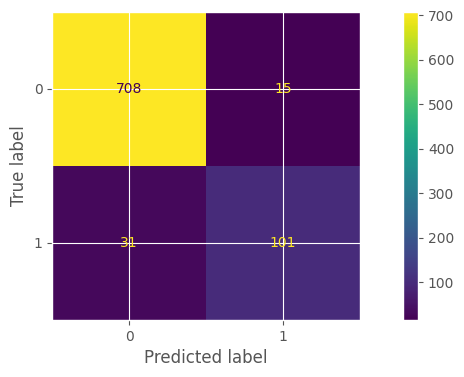

In [32]:
# Store predicted labels of the Random Forest classifier 
y_pred = rf_preds

# Import additional metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay


# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))
# visualize
display(ConfusionMatrixDisplay.from_estimator(rf, X_test_scaled, y_test))

There are 15 false positives and 31 false negatives.

In [33]:
# Print the precision
print(precision_score(y_test,y_pred))

0.8706896551724138


In [34]:
# Print the recall
print(recall_score(y_test, y_pred))

0.7651515151515151


In [35]:
# Varying training set size
X_train_scaled2, X_test_scaled2, y_train2, y_test2 = train_test_split(X_scaled, y, test_size=0.2,random_state=42)

# Fit to the training data
rf.fit(X_train_scaled2, y_train2)

# Predict the labels of the test set
y_pred2 = rf.predict(X_test_scaled2)

# Print confusion matrix
print(confusion_matrix(y_test2,y_pred2))

[[469  10]
 [ 25  66]]


In [36]:
# Print the precision
print(precision_score(y_test2,y_pred2))

0.868421052631579


In [37]:
# Print the recall
print(recall_score(y_test2, y_pred2))

0.7252747252747253


The model with 80% training data ended up with a lower precision and recall than the one with 70%.

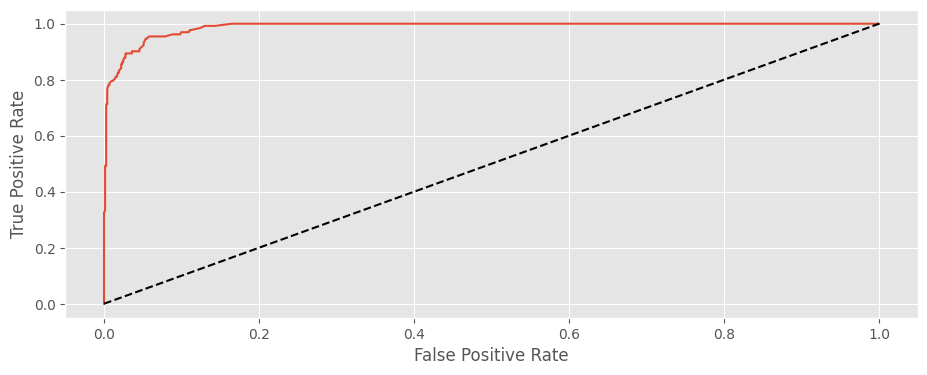

In [38]:
# Other model metrics

# Generate the probabilities
y_pred_prob = rf.predict_proba(X_test_scaled)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

Every prediction the classifier makes on a new data point has an associated probability. By default in scikit-learn, if this probability is above 50%, then the model would predict the data point as belonging to the positive class, and if it is lower than 50%, it would predict the negative class. If we vary this threshold, and, for each threshold, plot the model's true positive rate against the false positive rate we get the ROC curve. 

Visually, it looks like a well-performing model. Let's quantify this by computing the area under the curve, a better performing model will have a larger area under the curve.

In [39]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test,y_pred_prob))

0.9884634729033068


This indicates that this baseline random forest classifier is quite good!

 Another metric is the F1 score, which is calculated as: 2 * (precision * recall) / (precision + recall)

In [40]:
# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_pred,y_test))

0.8145161290322581


Next, we will use Cross-validation  to evaluate the model on multiple test sets instead of just one test set.

In [41]:
from sklearn.model_selection import cross_validate
# Define the scoring metrics
metrics = ["accuracy", "precision", "recall", "f1"]
# Perform 5-fold cross-validation
cv_scores = cross_validate(rf, X_scaled, y, cv=5, scoring=metrics,return_estimator=True)
# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: {'fit_time': array([0.20096231, 0.18664622, 0.19166708, 0.19909453, 0.19598508]), 'score_time': array([0.01399994, 0.01300025, 0.01293159, 0.0136764 , 0.01264238]), 'estimator': [RandomForestClassifier(random_state=42), RandomForestClassifier(random_state=42), RandomForestClassifier(random_state=42), RandomForestClassifier(random_state=42), RandomForestClassifier(random_state=42)], 'test_accuracy': array([0.95087719, 0.94736842, 0.95263158, 0.93859649, 0.94035088]), 'test_precision': array([0.87654321, 0.86419753, 0.86904762, 0.85526316, 0.88888889]), 'test_recall': array([0.79775281, 0.78651685, 0.82022472, 0.73033708, 0.71111111]), 'test_f1': array([0.83529412, 0.82352941, 0.84393064, 0.78787879, 0.79012346])}


The most important things to look at are the mean and the standard deviation of the scores. The mean tells us how good the model is on average. The standard deviation tells us how consistent the model is. If the standard deviation is high, it means that the model performs very differently on different folds.

In [42]:
for metric in metrics:
    metric_key = f"test_{metric}"
    print(f"Mean {metric} : {cv_scores[metric_key].mean():.3f}, std: {cv_scores[metric_key].std():.3f}")

Mean accuracy : 0.946, std: 0.006
Mean precision : 0.871, std: 0.011
Mean recall : 0.769, std: 0.041
Mean f1 : 0.816, std: 0.023


We can get the model with the best score:

In [43]:
import numpy as np

# Get the scores for the specified metric
scores = cv_scores["test_f1"]
# Find the index of the model with the best performance
best_model_index = np.argmax(scores)
# Get the best model
best_model = cv_scores["estimator"][best_model_index]
print(best_model)

RandomForestClassifier(random_state=42)


And the corresponding metrics:

In [44]:
for metric in metrics:
    metric_key = f"test_{metric}"
    print(f"Best {metric} : {cv_scores[metric_key].max():.3f}")

Best accuracy : 0.953
Best precision : 0.889
Best recall : 0.820
Best f1 : 0.844


### Review process

Each machine learning algorithm has its own specific hyperparameters. These are at are set before the model is trained, and these values inform how the model learns from the data. Grid search is a brute force search through the hyperparameter space to find the optimal value for the hyperparameter of interest. The default hyperparameters used by models are not optimized for the data. The goal of grid search cross-validation is to identify those hyperparameters that lead to optimal model performance.

We will now tune our model using randomized search, the training data and a 3 fold cross validation.

*   n_estimators = number of trees in the foreset
*   max_features = max number of features considered for splitting a node
*   max_depth = max number of levels in each decision tree
*   min_samples_split = min number of data points placed in a node before the node is split
*   min_samples_leaf = min number of data points allowed in a leaf node
*   bootstrap = method for sampling data points (with or without replacement)

In [45]:
# Import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_scaled, y_train)

# Print the best parameter and best score
print("Best Parameter:", rf_random.best_params_)
print("Best Score:", rf_random.best_score_)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameter: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Best Score: 0.9473684210526315



*   criterion:	Quality of Split
*   max_features:	Number of features for best split
*   max_depth:	Max depth of tree
*   bootstrap:	Whether Bootstrap samples are used

Using the test split, we compare the baseline and tuned models with a classification report.

In [46]:
# Decision tree
print(classification_report(y_test, y_pred))
print(classification_report(y_test, rf_random.best_estimator_.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       723
           1       0.87      0.77      0.81       132

    accuracy                           0.95       855
   macro avg       0.91      0.87      0.89       855
weighted avg       0.94      0.95      0.94       855

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       723
           1       0.82      0.77      0.80       132

    accuracy                           0.94       855
   macro avg       0.89      0.87      0.88       855
weighted avg       0.94      0.94      0.94       855



The tuned model did not achieve better metrics, which indicates that the default parameters were set optimally for this dataset.

Next, we analyze the most important features of our model.

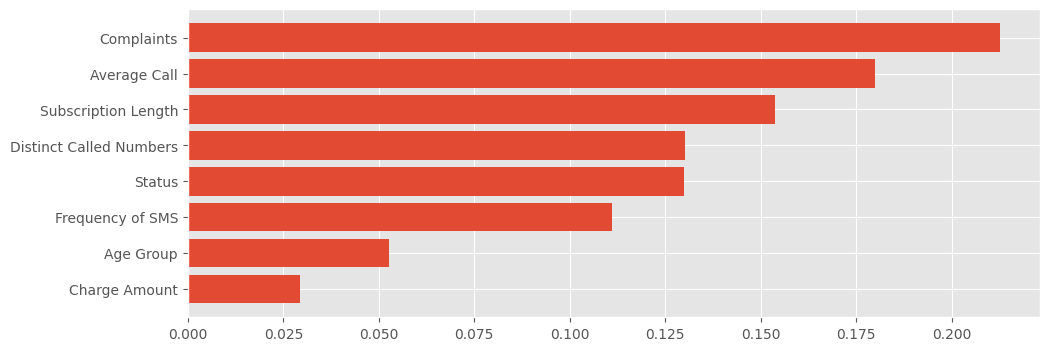

In [47]:
# Feature importances

# Calculate feature importances
importances = rf.feature_importances_

# Sort importances
sorted_index = np.argsort(importances)

# Create labels
labels = X.columns[sorted_index]

# Create plot
plt.barh(range(X.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()

The plot tells us that Complaints, Average Call and Subscription Length are the most important drivers of churn.

On the other hand, Charge Amount is the least important feature in predicting churn.

Finally, we inspect whether performance differs among ordinal features Age Group and Charge Amount.

In [48]:
  # Define the age groups
age_groups = df['Age Group'].unique()

  # Iterate over age groups
for group in age_groups:
    print(f"Age group: {group}")    
    
    # Subset the data for the current income category
    subset_data = df[df['Age Group'] == group]

    #Encode
    X = subset_data.drop("Churn", axis=1).values
    # We do not need to encode the target variable, but it makes evaluation easier later
    y = subset_data["Churn"]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Rescale features
    rescaledX_train = MinMaxScaler().fit_transform(X_train)
    rescaledX_test = MinMaxScaler().fit_transform(X_test)

    # Train and evaluate a random forest classifier
    rf = RandomForestClassifier()
    rf.fit(rescaledX_train, y_train)
    rf_preds = rf.predict(rescaledX_test)
    
    print(classification_report(y_test, rf_preds, zero_division=0))

Age group: 3
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       316
           1       0.92      0.77      0.84        73

    accuracy                           0.94       389
   macro avg       0.93      0.88      0.90       389
weighted avg       0.94      0.94      0.94       389

Age group: 2
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       228
           1       0.92      0.47      0.62        49

    accuracy                           0.90       277
   macro avg       0.91      0.73      0.78       277
weighted avg       0.90      0.90      0.89       277

Age group: 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34

Age group: 4
              precisi

Age group 1 has no churned customers, and is therefore not particulary interesting to us.
We observe similar performence for groups 2 and 3.

In [49]:
  # Define the age groups
charge_groups = df['Charge Amount'].unique()

  # Iterate over age groups
for group in charge_groups:
    print(f"Charge Amount: {group}")    
    
    # Subset the data for the current income category
    subset_data = df[df['Charge Amount'] == group]

    #Encode
    X = subset_data.drop("Churn", axis=1).values
    # We do not need to encode the target variable, but it makes evaluation easier later
    y = subset_data["Churn"]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Rescale features
    rescaledX_train = MinMaxScaler().fit_transform(X_train)
    rescaledX_test = MinMaxScaler().fit_transform(X_test)

    # Train and evaluate a random forest classifier
    rf = RandomForestClassifier()
    rf.fit(rescaledX_train, y_train)
    rf_preds = rf.predict(rescaledX_test)
    
    print(classification_report(y_test, rf_preds, zero_division=0))

Charge Amount: 0
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       367
           1       0.81      0.71      0.75       106

    accuracy                           0.90       473
   macro avg       0.86      0.83      0.84       473
weighted avg       0.89      0.90      0.89       473

Charge Amount: 1
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       155
           1       0.80      0.62      0.70        13

    accuracy                           0.96       168
   macro avg       0.88      0.80      0.84       168
weighted avg       0.96      0.96      0.96       168

Charge Amount: 2
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       100
           1       1.00      0.33      0.50         9

    accuracy                           0.94       109
   macro avg       0.97      0.67      0.74       109
weighted avg       0.95

Again, high charge amount categories consist of only existing customers, have high scores, but low support.

The worst scores are associated with the lowest charge amount category. This seems reasonable as it also includes the most churned customers, a class harder to predict.

### Determine next steps

Potential directions for future work could involve the exploration of other advanced machine learning models and ensemble methods, deeper feature engineering, and a more detailed investigation into customer behaviour and satisfaction data. It would also be beneficial to develop and evaluate intervention strategies based on our predictive insights, ensuring that businesses can put our findings into action for effective customer retention.


## 6. Deployment

### Produce a final report

check


### Review project

Our work in this project brought a lot of important insights when it comes to predicting customer churn. We started off with a detailed exploration of our dataset, making sense of the different variables and discovering important patterns. We found variables such as customer complaints, age groups, tariff plans, and usage patterns to be potentially influential in predicting churn and removed customer value as it was highly correlated with other features. In the pre-processing phase, the data was cleaned and scaled, and the features were encoded suitably.

During the model selection phase, we compared various supervised machine learning models, including logistic regression, random forests, and support vector machines. The Random Forest model performed the best in its initial tests. However, due to the imbalance in our dataset, accuracy alone was not a reliable metric. We thus also considered other metrics such as precision, recall, F1-score, and ROC-AUC.

Our random forest model achieved a respectable performance in terms of recall, which is arguably the most important metric for our business objective. The Area Under the ROC Curve was large, indicating that our classifier is quite effective.

Cross-validation was used to confirm the stability of our model and hyperparameters were optimized using grid search. The tuning process, however, did not indicate any significant improvement, meaning that the default parameters were optimal for this dataset.

Finally, feature importance analysis revealed that 'Complaints', 'Average Call' and 'Subscription Length' were the most significant drivers of churn. On the other hand, 'Charge Amount' was the least significant predictor. We also found that high 'Charge Amount' categories consist of only existing customers with high scores but low support, while the lowest 'Charge Amount' category was associated with the worst scores and included most of the churned customers.






Lessons learned:

In our work, we explored several essential areas of study. These included making reliable forecasts, responsibly splitting the data into training and test subsets, and gaining a deep understanding of model metrics. Such metrics included the confusion matrix, ROC curves, and the area under the curve - crucial tools for assessing our models' performance.

A noteworthy accomplishment was our effective fine-tuning of the churn model's hyperparameters. We achieved this using grid search, which boosted our model's performance and deepened our understanding of the interplay between different parameters and their impact on the results.

Finally, we became proficient at identifying influential variables, determining the elements that were most crucial in forecasting churn. This knowledge not only augmented our predictive capabilities but also provided a comprehensive understanding of the dynamics influencing customer attrition.


Literature and domain context:

A sizable collection of research devoted to comprehending and forecasting consumer behavior can be found in the literature on customer churn and machine learning methods in marketing analytics. The use of machine learning algorithms to predict customer churn has been the subject of numerous research, offering practical approaches and insights for firms looking to enhance their customer retention efforts.

The research intends to design and assess intervention strategies based on predictive insights to put findings into practice. Businesses can successfully retain high-risk clients by customizing their offers, loyalty programs, and proactive customer service.

Our project employs machine learning to analyze and forecast customer turnover in market analytics. We seek to find patterns and evidence to predict customer churn, enabling organizations to retain customers proactively, by evaluating customer behavior, previous transactional data, and other pertinent factors.

The online DataCamp course Marketing Analytics: Predicting Customer Churn in Python provided a roadmap to help develop our customer churn model. It shows how to discover how to examine and visualize data, get it ready for modeling, use machine learning to anticipate the future, and share crucial, practical insights with stakeholders. The course illustrated different topics: exploratory data analysis, preprocessing for churn modeling, churn prediction, and model tuning.We also developed the necessary knowledge about the topic and modeling as a team, thanks to the covered material during the tutorial sessions. Further, Assignment 3 served as a model of inspiration for developing some sections of this project.